In [2]:
import pandas as pd
import numpy as np
import os
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [3]:
os.getcwd()

'/workspaces/Problem_set2_BDML'

In [5]:
casas = pd.read_csv('/workspaces/Problem_set2_BDML/stores/base_datos_tratada.csv')

Intentaremos hacer un modelo de k-vecinos para solucionar el problema de missing values en variables importantes para nuestro estudio

<Axes: >

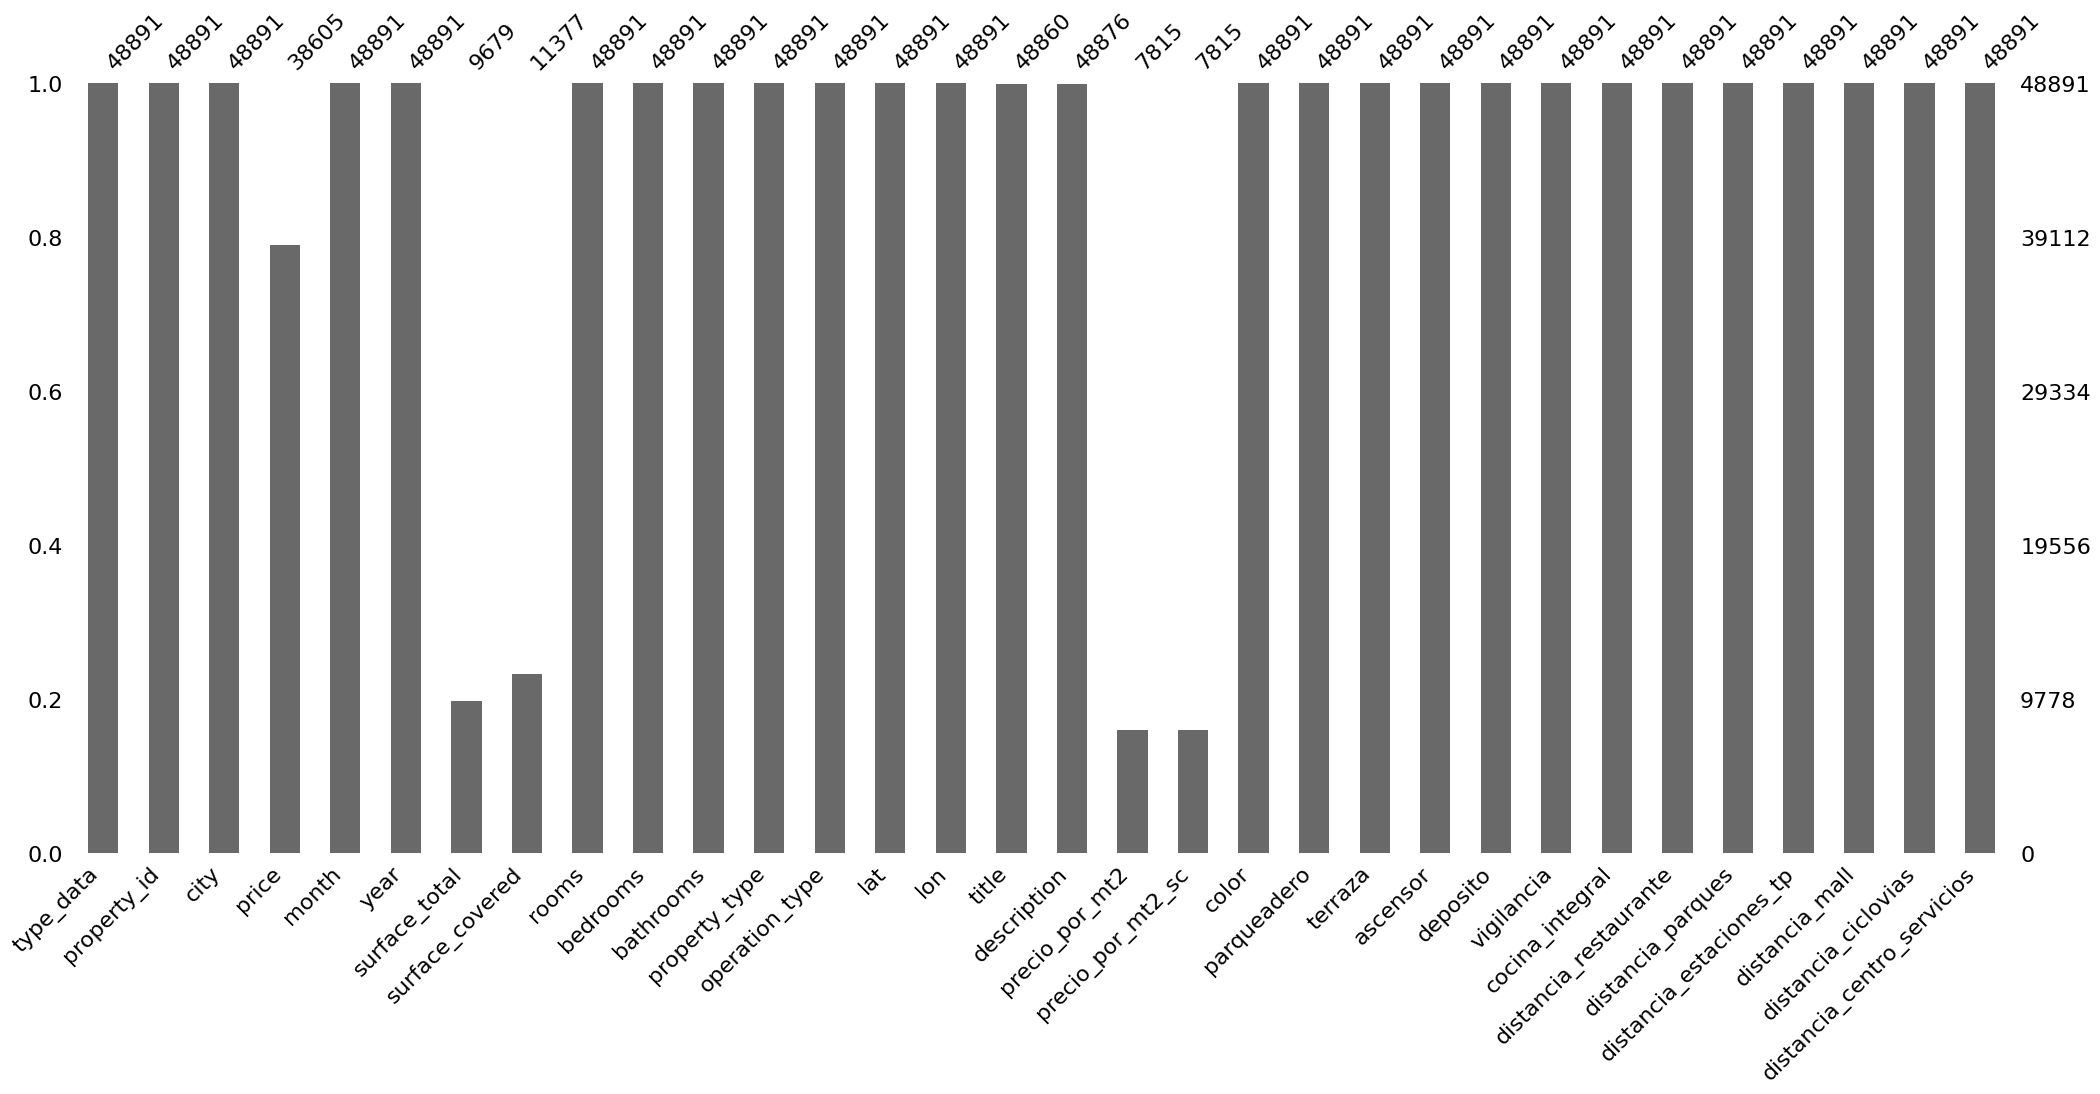

In [6]:
msno.bar(casas)

In [7]:
#Quitamos las variables no numericas
casas = casas.select_dtypes(exclude = ['object'])

In [8]:
#Comenzamos con un modelo sencillo
imputacion = KNNImputer(n_neighbors = 1, weights = 'distance')

In [9]:
#Lo implementamos
casas_knn = imputacion.fit_transform(casas)

In [10]:
#Vamos a ver como le fue

#Tranformamos en dataframe
casas_knn = pd.DataFrame(casas_knn)
#Ponemos nombres de columnas
casas_knn.columns = list(casas.columns.values)

casas_knn

,type_data,price,month,year,surface_total,surface_covered,rooms,bedrooms,bathrooms,lat,...,ascensor,deposito,vigilancia,cocina_integral,distancia_restaurante,distancia_parques,distancia_estaciones_tp,distancia_mall,distancia_ciclovias,distancia_centro_servicios
0,1.0,5.800000e+08,10.0,2020.0,136.0,136.0,3.0,3.0,2.0,4.707211,...,0.0,0.0,0.0,0.0,154.235265,231.089150,1766.961653,495.193141,1832.908735,1453.693500
1,1.0,6.000000e+08,10.0,2020.0,161.0,161.0,9.0,9.0,2.0,4.612200,...,0.0,1.0,0.0,0.0,241.721101,50.341416,2380.221077,841.474317,4099.793278,1978.803065
2,1.0,4.000000e+08,10.0,2020.0,331.0,112.0,8.0,8.0,2.0,4.586620,...,0.0,0.0,0.0,0.0,280.253026,168.366002,3598.155341,721.655341,3831.696986,1013.837460
3,1.0,8.000000e+08,10.0,2020.0,480.0,140.0,6.0,6.0,2.0,4.678147,...,0.0,1.0,0.0,0.0,208.582807,407.701140,3955.638932,451.149357,1492.445775,490.970545
4,1.0,4.800000e+08,10.0,2020.0,109.0,245.0,3.0,3.0,3.0,4.756503,...,0.0,0.0,0.0,0.0,11.600085,162.969700,3304.065598,429.654825,2696.154786,72.614360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,2.0,3.200000e+08,6.0,2019.0,94.0,94.0,3.0,3.0,2.0,4.630923,...,0.0,0.0,0.0,1.0,26.815721,60.278220,836.511970,516.821342,4163.699871,500.683211
48887,2.0,8.900000e+08,6.0,2019.0,181.0,147.0,3.0,3.0,3.0,4.671015,...,0.0,1.0,0.0,0.0,251.226569,150.323349,386.045197,464.245157,4167.116672,207.804022
48888,2.0,7.500000e+08,6.0,2019.0,118.0,90.0,3.0,3.0,3.0,4.672089,...,0.0,1.0,0.0,0.0,389.850014,173.413567,319.580883,581.925209,4082.232833,162.679849
48889,2.0,7.500000e+08,6.0,2019.0,129.0,79.0,3.0,3.0,3.0,4.672089,...,0.0,1.0,0.0,0.0,389.850014,173.413567,319.580883,581.925209,4082.232833,162.679849


<Axes: >

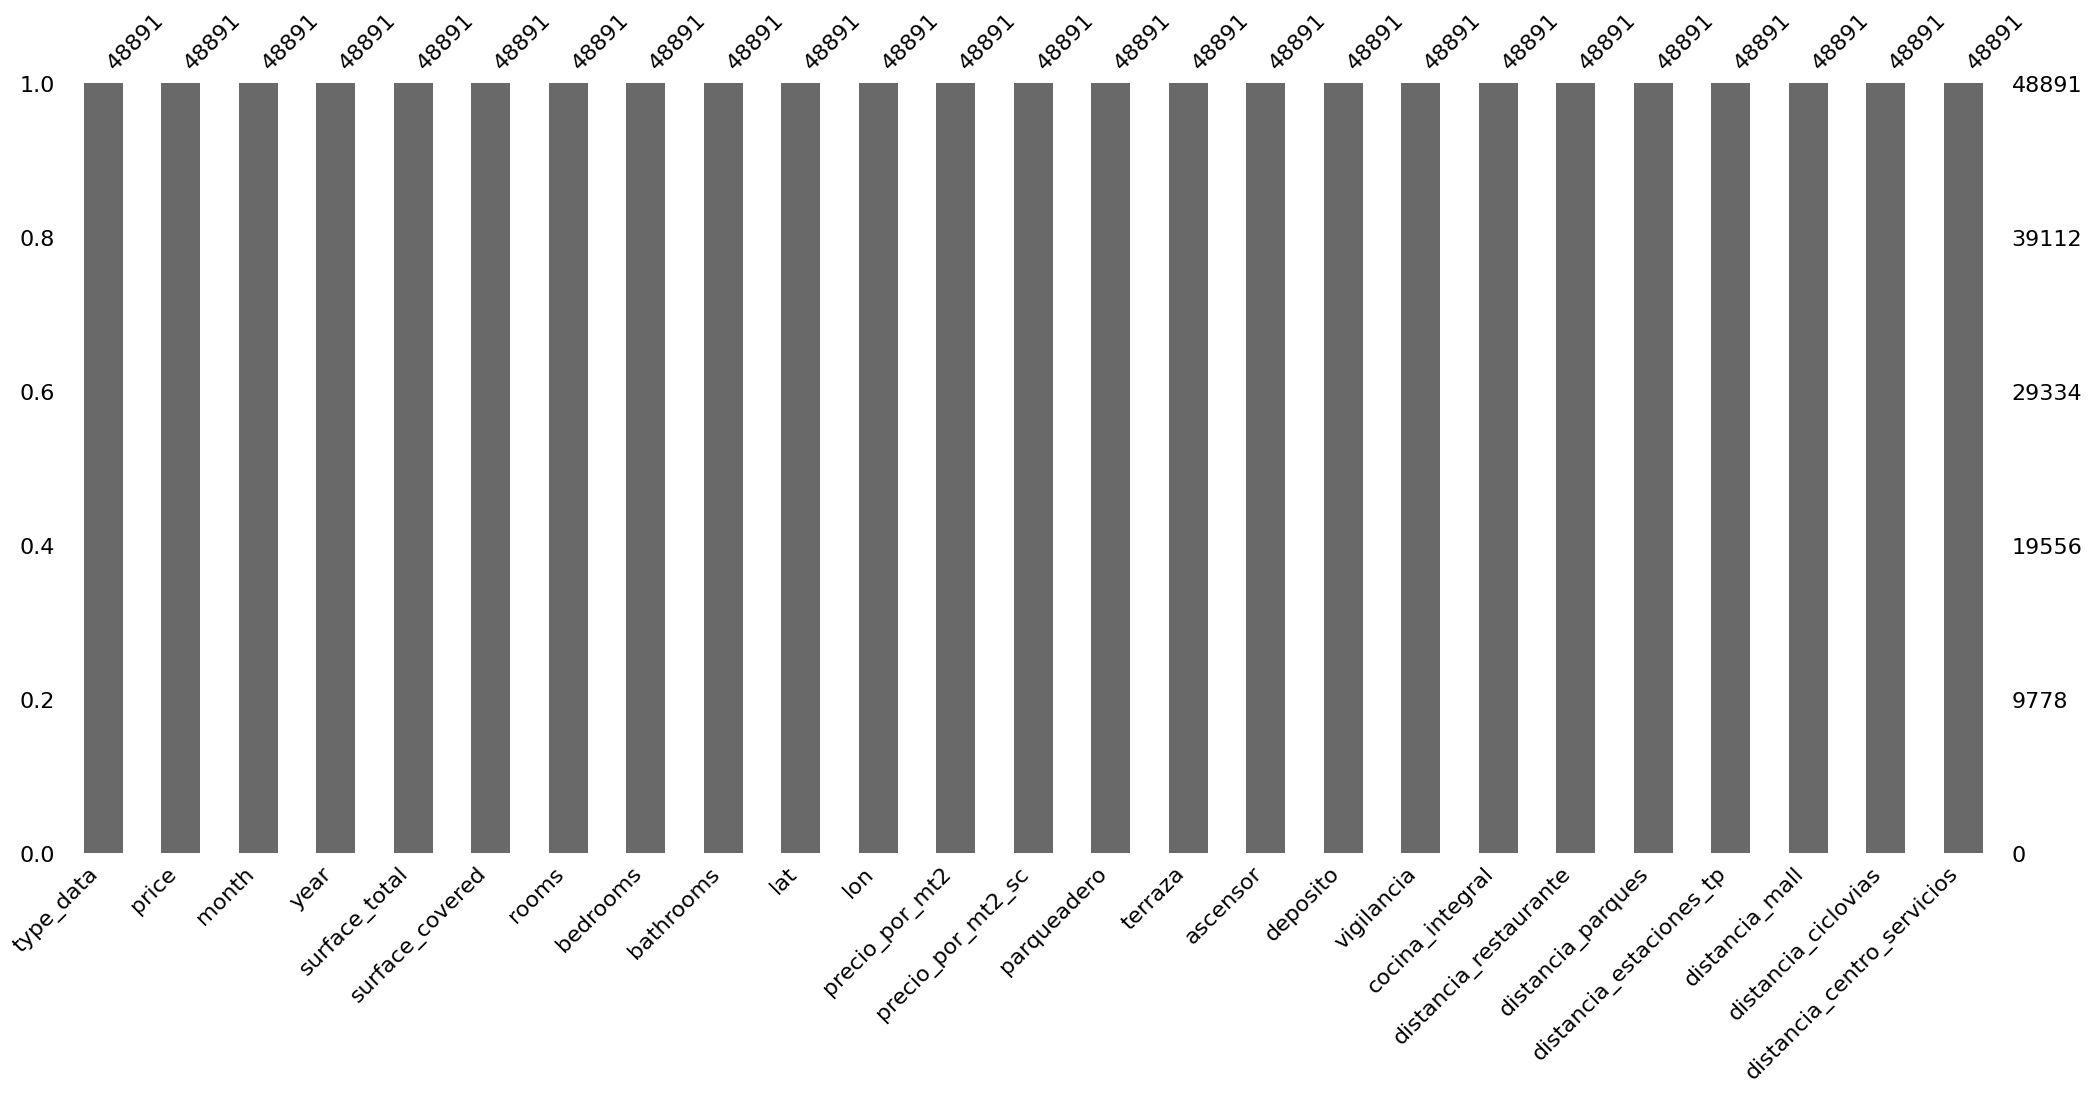

In [11]:
#Completamos todos los campos
#Proponemos un cross-validation
msno.bar(casas_knn)

Vamos a calibrar el hiper parametro usando cross-validation

In [12]:
x = casas_knn.drop(columns = ['price'])
y = casas_knn['price']

# Creamos un nuevo modelo
knn2 = KNeighborsRegressor()

# Creamos un rango de valores para probar
param_grid = {'n_neighbors': np.arange(1, 25)}

# Implementamos y luego hacemos fit
# Estamos haciendo un cross-validation de 5 grupos
knn_casas_grid = GridSearchCV(knn2, param_grid, cv = 15)
knn_casas_grid.fit(x, y)

GridSearchCV(cv=15, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [13]:
#miramos el mejor parametro
knn_casas_grid.best_params_
#Encontramos que en este caso, usar 1 vecino es el mejor hiperparametro

{'n_neighbors': 1}

In [14]:
knn_casas_grid.best_score_
#Estamos prediciendo un 88.11% de los precios
#Isto lo logramos imputando valors con k-vecinos

0.8810713604419695

In [16]:
#Guardamos la base
ruta = '/workspaces/Problem_set2_BDML/stores/base_imputada_kvecinos.csv'
casas_knn.to_csv(ruta, index = False)